# How to use the \XRD repository files for easy XRD plotting
### Andrew Garcia, 2019

In order to use this script effectively, your XRD files must first be converted from .xy form (or whichever other extension they have) to .csv form.

If a simple background subtraction / treatment of a single file is what you're looking for, use **XRDsingle.py**. The operation is very simple: Just call the XRDsingle module, define the path of your file, and run the **make0()** command. This command has options which allow you to have the treatment overlaid, import it to excel , and check for secondary emission peaks:

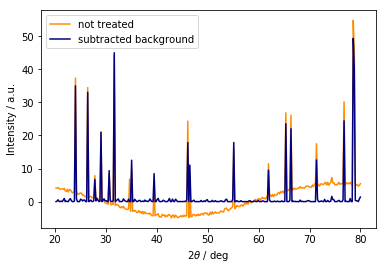

In [22]:
from XRDsingle import *
path=r'C:\Users\garci\Dropbox (UFL)\Research\XRD\_files/sample2.csv'
make0(path,overlaid = True, toexcel = False, second_emission = False)

For the case above I set overlaid to *True*, though we can always decouple it by setting the bool to *False*:

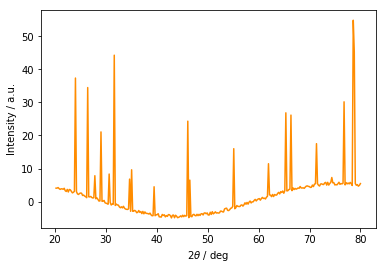

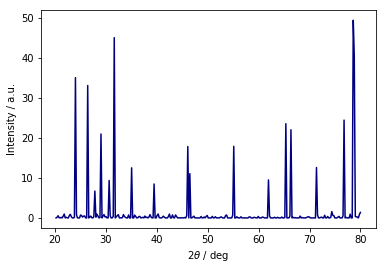

In [23]:
make0(path,overlaid = False, toexcel = False, second_emission = False)

For a more complex subplot rendering using data from a database you may want to use **XRD.py**. In such a case, do the following:

* Download the Excel database template *database_template.xlsx* and the *\fakeXRDfiles* folder located in this \XRD repository
* Change fpath (line above data() function in **XRD.py**) to directory where XRD files are being housed i.e. ***fpath = r'C:\...fakeXRDfiles/'***
* Use the following function templates below (You may either place these functions in a new .py script and import the script to XRD.py or copy them to XRD.py):


In [13]:
import pandas
def database():
#    change to your path
    return pandas.read_excel(r'C:\Users\garci\Dropbox (Personal)\scripts\XRD\database_template.xlsx')
    
print(database()['name'],'\n')

0    example1
1    example2
2    example3
3    example4
4    example5
Name: name, dtype: object 



**database()**  reads the Excel database in python.

In [14]:
def select():
    
    'FIRST CHART (OVERLAID PLOTS)'
    labels= list(database()['name'])
    oplts = [
            list.index(labels,'example1'),
            list.index(labels,'example2'),
            list.index(labels,'example3')
            ]
    
    
    [oplts.append('empty') for i in range(5)]
    
    '---------------------------------------------------------------'

    'NEXT CHARTS BEYOND FIRST (INDIVIDUAL PLOTS PER CHART)'
    
    iplts = [
            list.index(labels,'example4'),
            list.index(labels,'example5')
            ]
    
    '---------------------------------------------------------------'
    n = 1 + len (iplts)
    
    return oplts,iplts,n

The **select()** function does some indexing and its role is self-explanatory.  If you want more than 5 overlaid plots, change the 5 in range(5) to the number of overlaid plots you want AND the "if any" line in the make() function (complex... more than 3 overlaid plots don't look nice anyways). 

example1
example2
example3
example4
example5

*Crystallite size calculated using Scherrer equation.


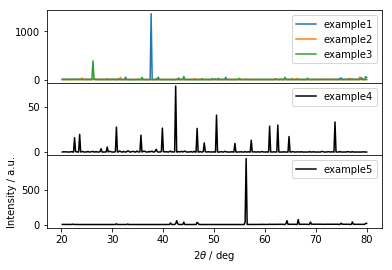

In [16]:
from XRD import *

make(database,select,'')

For comparison, the example files before the ***make()*** processing look like this:

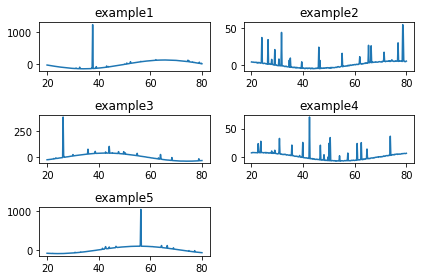

In [17]:
import pandas
def rep(sampleno):
    df = pandas.read_csv(r'C:\Users\garci\Dropbox (Personal)\scripts\XRD\fakeXRDfiles/sample'+str(sampleno)+'.csv',header = None)
    #print(df)
    plt.plot(df[0],df[1])
    plt.title('example'+str(sampleno))
    

fig = plt.figure()
plt.subplot(3, 2, 1)
rep(1)
plt.subplot(3, 2, 2)
rep(2)
plt.subplot(3, 2, 3)
rep(3)
plt.subplot(3, 2, 4)
rep(4)
plt.subplot(3, 2, 5)
rep(5)
fig.tight_layout()
plt.show()

I hope you enjoyed this short tutorial.

-Andy <3